In [36]:
# 1 - LOAD THE BREAST CANCER DATA FROM SKLEARN #
from sklearn.datasets import load_breast_cancer

In [37]:
# 2 - BUILD THE MODEL #
from sklearn.model_selection import train_test_split
import pandas as pd

breast_cancer_data = load_breast_cancer()

target2Lump = {i : spec for i, spec in enumerate(breast_cancer_data.target_names)}

df_bc = pd.concat([pd.DataFrame(data=breast_cancer_data.data, columns=breast_cancer_data.feature_names),
                     pd.DataFrame(data=breast_cancer_data.target, columns=['Lump'])], axis=1)

df_bc['Lump'] = df_bc['Lump'].map(target2Lump)


X, y = breast_cancer_data.data[:, :2], breast_cancer_data.target 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=99,
                                                    shuffle=True)

In [38]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (398, 2)
y_train.shape: (398,)
X_test.shape: (171, 2)
y_test.shape: (171,)


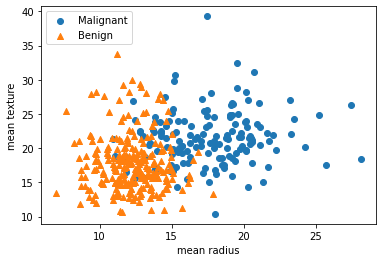

In [39]:
import matplotlib.pyplot as plt

plt.scatter(X_train[y_train == 0, 0],
            X_train[y_train == 0, 1],
            marker='o',
            label='Malignant')

plt.scatter(X_train[y_train == 1, 0],
            X_train[y_train == 1, 1],
            marker='^',
            label='Benign')

plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.legend(loc='upper left')

plt.show()

In [40]:
# LOGISTIC REGRESSION MODEL WITH TWO FEATURES #
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
lreg.fit(X_train, y_train)

LogisticRegression()

In [41]:
y_pred = lreg.predict(X_test)
print(f'Test set accuracy: {lreg.score(X_test, y_test)*100:.2f}%')

Test set accuracy: 90.06%


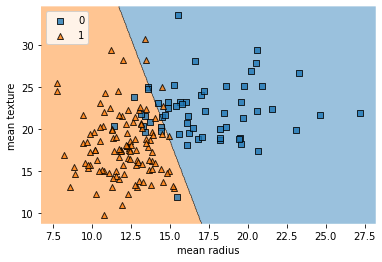

In [42]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_test, y_test, lreg)
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.legend(loc='upper left')
plt.show()

For KNeighborsClassifier(): 

Training set accuracy: 90.45%
Test set accuracy: 88.89%
For GaussianNB(): 

Training set accuracy: 87.94%
Test set accuracy: 88.89%
For LogisticRegression(): 

Training set accuracy: 88.94%
Test set accuracy: 90.06%
For Perceptron(): 

Training set accuracy: 71.86%
Test set accuracy: 73.68%


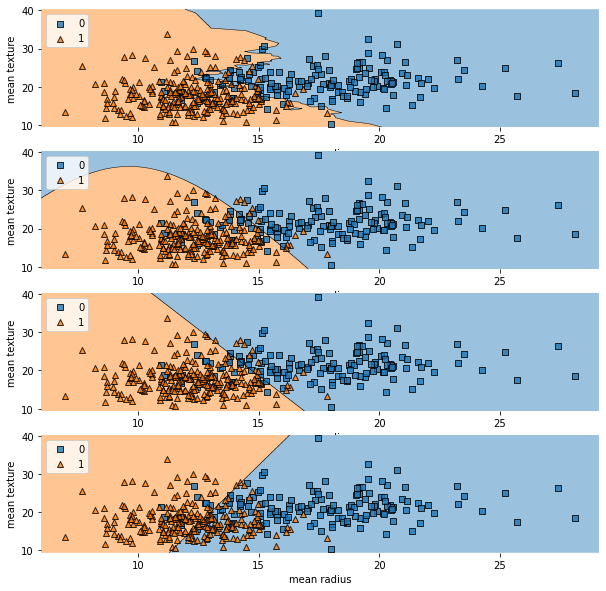

In [43]:
# K-NN, Perceptrion, and GaussianNB #
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron

fig, axes = plt.subplots(4,figsize=(10,10))
classifiers = [KNeighborsClassifier(), GaussianNB(), LogisticRegression(), Perceptron()]
for model, ax in zip (classifiers, axes):
    clf=model.fit(X_train, y_train)
    print("=====================================")
    print("=====================================")
    print(f"For {model}: \n")    
    print(f'Training set accuracy: {clf.score(X_train, y_train)*100:.2f}%')
    print(f'Test set accuracy: {clf.score(X_test, y_test)*100:.2f}%')
    plot_decision_regions(X_train, y_train, clf, ax=ax)
    ax.set_xlabel('mean radius')
    ax.set_ylabel('mean texture')
    ax.legend(loc='upper left')
plt.show()

In [44]:
# 3 - LOGISTIC REGRESSION MODEL WITH ALL FEATURES #

X1, y1 = breast_cancer_data.data[:, :], breast_cancer_data.target 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, 
                                                    test_size=0.3,
                                                    random_state=99,
                                                    shuffle=True)

lreg1 = LogisticRegression()
lreg1.fit(X1_train, y1_train)

y1_pred = lreg1.predict(X1_test)
print(f'Test set accuracy: {lreg1.score(X1_test, y1_test)*100:.2f}%')

Test set accuracy: 95.91%


C:\Users\tilin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
